### Mounting Google Drive for this project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Final_Project'

/content/drive/.shortcut-targets-by-id/1aKjr1glnbB2lU85sp9qCVNAJJ0wRz0B6/Final_Project


In [ ]:
!ls

 brain_clusters.h5ad
 brain_embeddings.h5ad
 data
'Final_Single_Cell_SeqRNA_DR&Clustering.ipynb'
'Final_Single_Cell_SeqRNA_DR&Clusteringv2.ipynb'
'Final_Single_Cell_SeqRNA_DR&Clusteringv3.ipynb'
'KM Clustering on 2D ICA.html'
'KM Clustering on 2D Isomaps.html'
'KM Clustering on 2D KPCA.html'
'KM Clustering on 2D Laplacian Eigenmaps.html'
'KM Clustering on 2D Modified LLE.html'
'KM Clustering on 2D Standard LLE.html'
'KM Clustering on 2D tSNE scanpy.html'
'KM Clustering on 2D UMAP scanpy.html'
 setup.py
 Single-cell-dr.ipynb
'Single_Cell_SeqRNA_DR&Clustering1.ipynb'
'Single_Cell_SeqRNA_DR&Clustering.ipynb'
 Trajectories_Answer_Key.ipynb
 Trajectories_Instructions.ipynb
 Trajectorythymus.h5ad


In [ ]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=934787288a45fbde241a0b36eb3469f3240a87176251d2908f037c42a027ad2f
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8042 sha256=72b9c6621dfb9a6a2e

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn import metrics
import plotly.offline as py
py.init_notebook_mode(connected=False)

import plotly.graph_objs as go
from plotly.graph_objs import XAxis, YAxis, ZAxis, Scene
from sklearn.decomposition import FastICA as ICA
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.manifold import SpectralEmbedding as LaplacianEigenMaps
from sklearn.manifold import Isomap

### Reading Dataset

In [ ]:
# Reading dataset
count_dataframe = pd.read_csv('data/brain_counts.csv', # where to find the data
                              index_col=0) # use the first column to label the rows (the 'index')

## print the first 5 rows of our dataframe
print(count_dataframe.head(5))

                         0610005C13Rik  0610007C21Rik  0610007L01Rik  \
A1.B003290.3_38_F.1.1                0            125             16   
A1.B003728.3_56_F.1.1                0              0              0   
A1.MAA000560.3_10_M.1.1              0            348              0   
A1.MAA000564.3_10_M.1.1              0             41             36   
A1.MAA000923.3_9_M.1.1               0             53              0   

                         0610007N19Rik  0610007P08Rik  0610007P14Rik  \
A1.B003290.3_38_F.1.1                0              0              0   
A1.B003728.3_56_F.1.1                0              0            324   
A1.MAA000560.3_10_M.1.1              0              0              5   
A1.MAA000564.3_10_M.1.1              0              0             24   
A1.MAA000923.3_9_M.1.1               0              0              0   

                         0610007P22Rik  0610008F07Rik  0610009B14Rik  \
A1.B003290.3_38_F.1.1                0              0         

In [ ]:
metadata_dataframe = pd.read_csv('data/brain_metadata.csv', index_col=0) # use the first column as the index
print(metadata_dataframe.head(5))

                        cell_ontology_class    subtissue mouse.sex mouse.id  \
cell                                                                          
A1.B003290.3_38_F.1.1             astrocyte     Striatum         F   3_38_F   
A1.B003728.3_56_F.1.1             astrocyte     Striatum         F   3_56_F   
A1.MAA000560.3_10_M.1.1     oligodendrocyte       Cortex         M   3_10_M   
A1.MAA000564.3_10_M.1.1    endothelial cell     Striatum         M   3_10_M   
A1.MAA000923.3_9_M.1.1            astrocyte  Hippocampus         M    3_9_M   

                        plate.barcode  
cell                                   
A1.B003290.3_38_F.1.1         B003290  
A1.B003728.3_56_F.1.1         B003728  
A1.MAA000560.3_10_M.1.1     MAA000560  
A1.MAA000564.3_10_M.1.1     MAA000564  
A1.MAA000923.3_9_M.1.1      MAA000923  


### Creating Annotated Dataset

In [ ]:
# Creating Annotated dataset
adata = sc.AnnData(X = count_dataframe, obs = metadata_dataframe)
print(adata)

AnnData object with n_obs × n_vars = 3401 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'


####Labeling Spike-ins

In [ ]:
is_spike_in = {}
number_of_spike_ins = 0

for gene_name in adata.var_names:
    if 'ERCC' in gene_name:
        is_spike_in[gene_name] = True # record that we found a spike-in
        number_of_spike_ins += 1 # bump the counter
    else:
        is_spike_in[gene_name] = False # record that this was not a spike-in
        
adata.var['ERCC'] = pd.Series(is_spike_in) # because the index of adata.var and the keys of is_spike_in match, anndata will take care of matching them up
print('The total number of spike ins found : ', number_of_spike_ins)

The total number of spike ins found :  92


In [ ]:
adata.write('data/brain_raw.h5ad') #saving annotated data

In [ ]:
# Reading annotated data
adata = sc.read('data/brain_raw.h5ad')

In [ ]:
adata.obs.head(5)

cell_ontology_class    subtissue mouse.sex mouse.id  \
cell                                                                          
A1.B003290.3_38_F.1.1             astrocyte     Striatum         F   3_38_F   
A1.B003728.3_56_F.1.1             astrocyte     Striatum         F   3_56_F   
A1.MAA000560.3_10_M.1.1     oligodendrocyte       Cortex         M   3_10_M   
A1.MAA000564.3_10_M.1.1    endothelial cell     Striatum         M   3_10_M   
A1.MAA000923.3_9_M.1.1            astrocyte  Hippocampus         M    3_9_M   

                        plate.barcode  
cell                                   
A1.B003290.3_38_F.1.1         B003290  
A1.B003728.3_56_F.1.1         B003728  
A1.MAA000560.3_10_M.1.1     MAA000560  
A1.MAA000564.3_10_M.1.1     MAA000564  
A1.MAA000923.3_9_M.1.1      MAA000923

In [ ]:
adata.var.tail(5)

ERCC
Zzef1              False
Zzz3               False
a                  False
l7Rn6              False
zsGreen_transgene  False

#### Quality Controls Metrics

In [ ]:
qc = sc.pp.calculate_qc_metrics(adata, qc_vars = ['ERCC'])# this returns a tuple of (cell_qc_dataframe, gene_qc_dataframe)
                                 # ask for the percentage of reads from spike ins
                                
cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

print('This is the cell quality control dataframe:\n', cell_qc_dataframe.head(5))

print('\n\n\n\nThis is the gene quality control dataframe:\n')
gene_qc_dataframe.head(5)

This is the cell quality control dataframe:
                          n_genes_by_counts  log1p_n_genes_by_counts  \
cell                                                                  
A1.B003290.3_38_F.1.1                 3359                 8.119696   
A1.B003728.3_56_F.1.1                 1718                 7.449498   
A1.MAA000560.3_10_M.1.1               3910                 8.271548   
A1.MAA000564.3_10_M.1.1               4352                 8.378621   
A1.MAA000923.3_9_M.1.1                2248                 7.718241   

                         total_counts  log1p_total_counts  \
cell                                                        
A1.B003290.3_38_F.1.1          390075           12.874097   
A1.B003728.3_56_F.1.1          776439           13.562475   
A1.MAA000560.3_10_M.1.1       1616087           14.295519   
A1.MAA000564.3_10_M.1.1        360004           12.793873   
A1.MAA000923.3_9_M.1.1         290282           12.578612   

                         pct_

n_cells_by_counts  mean_counts  log1p_mean_counts  \
0610005C13Rik                 28     0.118201           0.111721   
0610007C21Rik               2399   206.211996           5.333742   
0610007L01Rik                961    35.938547           3.609256   
0610007N19Rik                272     6.498383           2.014687   
0610007P08Rik                582    16.328727           2.852366   

               pct_dropout_by_counts  total_counts  log1p_total_counts  
0610005C13Rik              99.176713           402            5.998937  
0610007C21Rik              29.461923        701327           13.460731  
0610007L01Rik              71.743605        122227           11.713643  
0610007N19Rik              92.002352         22101           10.003423  
0610007P08Rik              82.887386         55534           10.924769

### Quality Control for Cells

Plot between log1p_n_genes_by_counts (log(1+x) where x is count of unique genes in a cell) and log1p_total_counts (log(1+x) where x is total count of genes in a cell). Plot another plot, a bivariate histogram using hexagonal bins with marginal histograms.

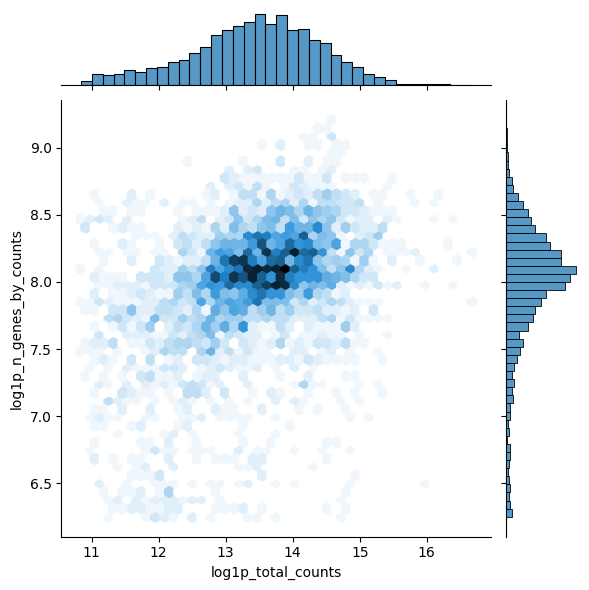

In [ ]:
import seaborn as sns
sns.jointplot(
    data=cell_qc_dataframe,
    x="log1p_total_counts",
    y="log1p_n_genes_by_counts",
    kind="hex",
)

Considering the total number of reads "total_counts" detected per cell. Cells with few reads are likely to have been broken or failed to capture a cell, and should thus be removed.

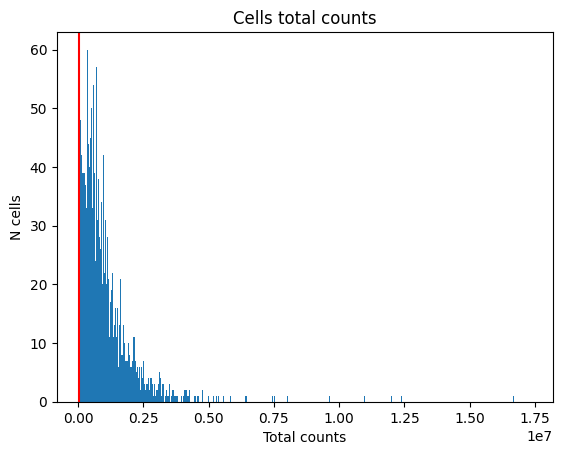

In [ ]:
plt.title('Cells total counts')
plt.hist(cell_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(50000, color='red')

It is seems like, broken or failed to capture cells have been already removed.

Counting the total number of unique genes detected in each sample.

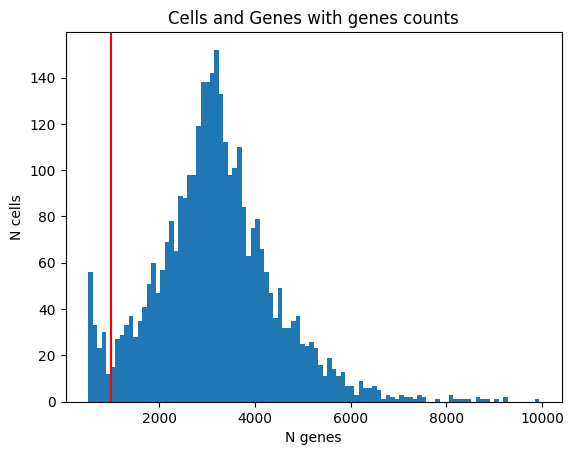

In [ ]:
# Detected Genes
plt.title('Cells and Genes with genes counts')
plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(1000, color='red')

From the plot we conclude that most cells have between ~1,000-5,000 detected genes, which is typical for smartseq2 data. However, this varies by experimental protocol and sequencing depth.

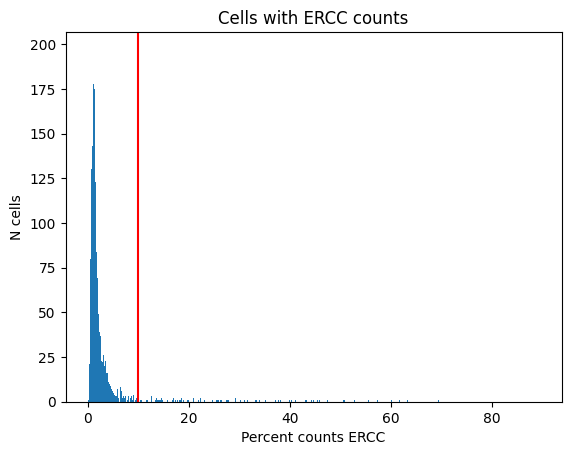

In [ ]:
## Spike Ins available in the dataset
plt.title('Cells with ERCC counts')
plt.hist(cell_qc_dataframe['pct_counts_ERCC'], bins=1000)
plt.xlabel('Percent counts ERCC')
plt.ylabel('N cells')
plt.axvline(10, color='red')

From the above plot, the majority of cells have less than 10% ERCC counts, but there's a long tail of cells that have very high spike-in counts; these are likely dead cells and should be removed.

### Cell filtering based on above analysis
There isn't an automatic function for removing cells with a high percentage of ERCC reads, but we can use a mask to remove them.

In [ ]:
# Removing cells having ERCC percentage count >= 10
low_ERCC_mask = (cell_qc_dataframe['pct_counts_ERCC'] < 10)
adata = adata[low_ERCC_mask]

In [ ]:
# Removing cell having gene count < 750
sc.pp.filter_cells(adata, min_genes = 750)

/usr/local/lib/python3.9/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



### Quality Control for Genes
It is typically a good idea to remove genes whose expression level is considered "undetectable".

We define a gene as detectable if at least two cells contain more than 5 reads from the gene. However, the threshold strongly depends on the sequencing depth.
It is important to keep in mind that genes must be filtered after cell filtering since some genes may only be detected in poor quality cells.

In [ ]:
gene_qc_dataframe.head(5)

n_cells_by_counts  mean_counts  log1p_mean_counts  \
0610005C13Rik                 28     0.118201           0.111721   
0610007C21Rik               2399   206.211996           5.333742   
0610007L01Rik                961    35.938547           3.609256   
0610007N19Rik                272     6.498383           2.014687   
0610007P08Rik                582    16.328727           2.852366   

               pct_dropout_by_counts  total_counts  log1p_total_counts  
0610005C13Rik              99.176713           402            5.998937  
0610007C21Rik              29.461923        701327           13.460731  
0610007L01Rik              71.743605        122227           11.713643  
0610007N19Rik              92.002352         22101           10.003423  
0610007P08Rik              82.887386         55534           10.924769

Plot between N Cells expressing > 0 and log(N genes) for the cell counts of gene.

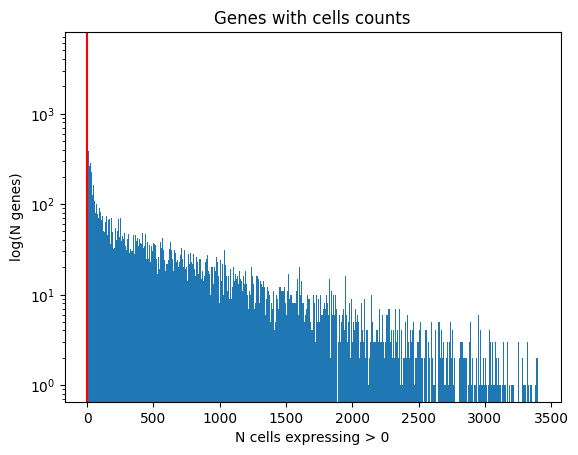

In [ ]:
plt.title('Genes with cells counts')
plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins=1000)
plt.xlabel('N cells expressing > 0')
plt.ylabel('log(N genes)') # for visual clarity
plt.axvline(2, color='red')
plt.yscale('log') 

Plot between Total counts of genes and log(N genes) for the total counts of genes.

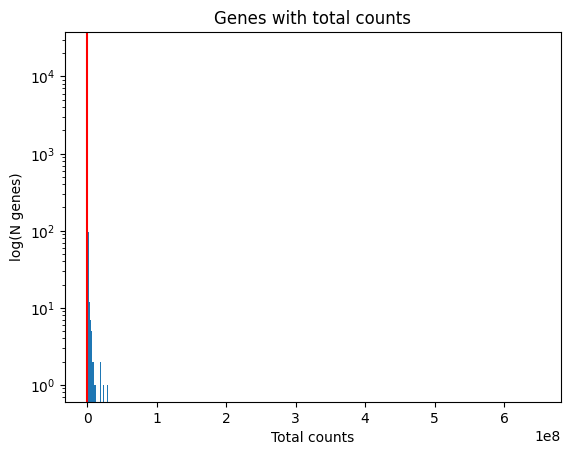

In [ ]:
plt.title('Genes with total counts')
plt.hist(gene_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('log(N genes)') # for visual clarity
plt.yscale('log') 
plt.axvline(10, color='red')

In [ ]:
## Filtering Genes
sc.pp.filter_genes(adata, min_cells = 2)
sc.pp.filter_genes(adata, min_counts = 10)

#### Saving Quality Controlled Data

In [ ]:
print(adata) ## Final dimensions of the QC'd dataset
adata.write('data/brain_qc.h5ad')

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC', 'n_cells', 'n_counts'


### Normalization
Dimensionality reduction methods seek to take a large set of variables and return a smaller set of components that still contain most of the information in the original dataset.

One of the simplest forms of dimensionality reduction is PCA. Principal component analysis (PCA) is a mathematical procedure that transforms a number of possibly correlated (e.g., expression of genes in a network) variables into a (smaller) number of uncorrelated variables called principal components ("PCs").


In [ ]:
## Loading quality control dataset
adata = sc.read("data/brain_qc.h5ad")

In [ ]:
adata.shape

(3210, 18585)

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



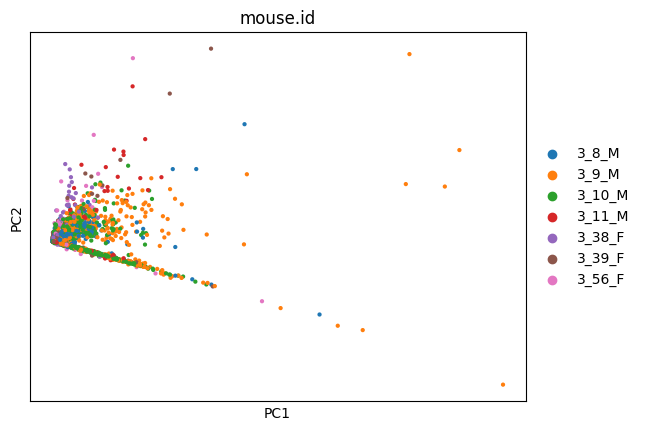

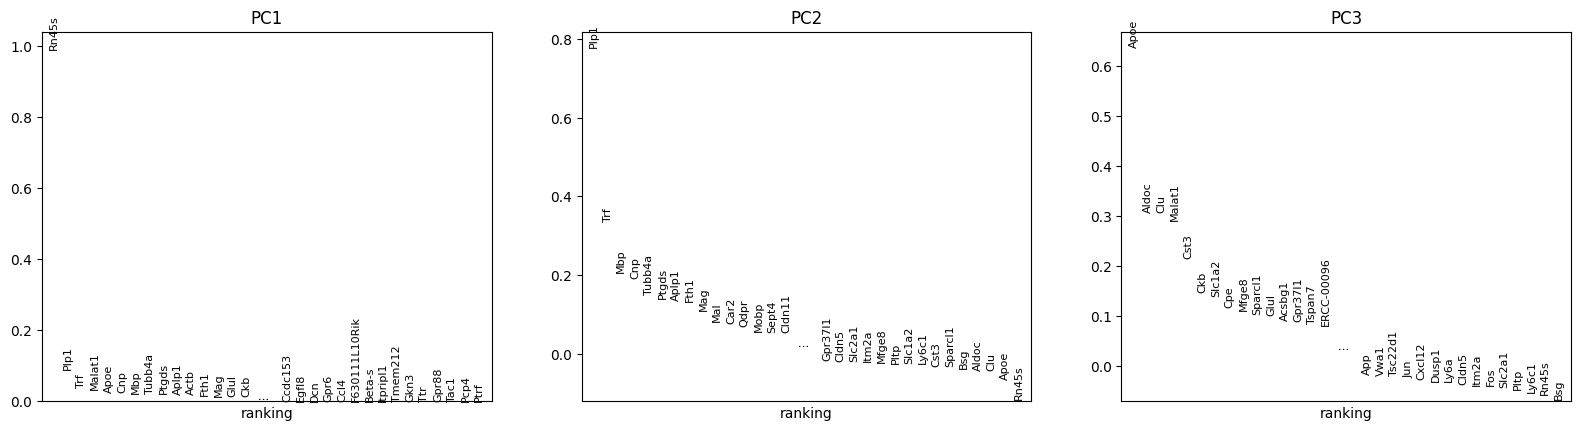

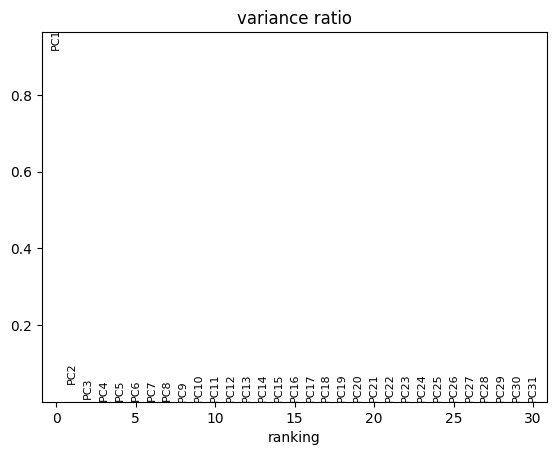

In [ ]:
sc.pp.pca(adata)  # applies pca on adata and adds results of pca in adata in .obsm, .varm, .uns
sc.pl.pca_overview(adata, color='mouse.id')  # plot the pca results with color as mouse.id 

The initial graph reveals an unusual, almost perfectly linear first principal component (PC), which accounts for the largest amount of variation in the dataset. This suggests that there may be some outliers present in the data. 

Moving on to the next row of graphs, we can see the loadings, which depict the extent to which each variable in the original data contributes to each PC. Interestingly, the first PC appears to be heavily influenced by the expression levels of only a small set of genes. 

The final graph in the series demonstrates that the first PC captures the majority of the variance in the original dataset, and that this variation is largely driven by a single gene. 

In [ ]:
adata.uns

OrderedDict([('pca',
              {'params': {'zero_center': True, 'use_highly_variable': False},
               'variance': array([7.57782081e+10, 3.81942914e+09, 6.94500624e+08, 3.08484999e+08,
                      2.63227368e+08, 2.13846111e+08, 1.70252544e+08, 1.36167213e+08,
                      8.26416428e+07, 5.90083972e+07, 4.80472411e+07, 4.61984941e+07,
                      4.13718280e+07, 3.16401711e+07, 3.07673338e+07, 2.82930440e+07,
                      2.59999784e+07, 2.27497873e+07, 2.10875197e+07, 1.88880728e+07,
                      1.69006481e+07, 1.57581542e+07, 1.48261436e+07, 1.37964653e+07,
                      1.33654032e+07, 1.19485000e+07, 1.11319053e+07, 1.06206045e+07,
                      1.03378224e+07, 9.83096769e+06, 8.65349817e+06, 8.30520541e+06,
                      7.72390529e+06, 7.61951954e+06, 7.32866236e+06, 6.91214488e+06,
                      6.78554127e+06, 6.14679091e+06, 6.07442828e+06, 5.88120446e+06,
                      5.57028

In [ ]:
print(adata.varm['PCs'].shape)
adata.varm['PCs']

(18585, 50)


array([[ 3.90559261e-07, -1.04339245e-06,  5.01953361e-06, ...,
         1.24506693e-05, -5.49261469e-06,  8.34793111e-06],
       [ 5.04033929e-04,  7.00641257e-04,  3.00280268e-03, ...,
         2.04545576e-03,  1.42752459e-02, -6.23745219e-03],
       [ 9.63757867e-05, -1.56630619e-04, -1.34476791e-04, ...,
         5.91278025e-03,  5.15749157e-03, -6.89312314e-03],
       ...,
       [ 6.28575389e-05,  8.21345351e-05,  1.00800709e-04, ...,
        -1.86724802e-03,  1.76053726e-03,  5.49906520e-03],
       [ 4.99979287e-08, -2.79155057e-07, -4.34064565e-07, ...,
        -4.06686790e-06, -4.97050236e-06,  3.38387423e-06],
       [ 2.24475899e-04, -1.46511584e-04,  1.68350801e-03, ...,
        -1.52033607e-03, -4.50203441e-03, -4.31560279e-03]])

In [ ]:
print(adata.obsm['X_pca'].shape)
adata.obsm['X_pca']

(3210, 50)


array([[-1.8424262e+05, -1.3552747e+04,  2.3973022e+03, ...,
         1.5601984e+03, -6.8164844e+02,  4.2361938e+01],
       [-1.6474755e+05, -1.9324459e+04,  5.1527844e+04, ...,
        -1.3176158e+03, -3.1714888e+03,  2.7396455e+03],
       [ 9.0670752e+03,  8.0857055e+04,  6.4449331e+03, ...,
        -2.2792837e+03,  4.0856451e+02, -5.2319739e+02],
       ...,
       [-1.8081212e+05, -1.4364995e+04, -4.0254963e+03, ...,
        -6.0876678e+02, -7.2786078e+02, -5.0457767e+02],
       [-4.4792086e+04,  1.3990004e+04, -3.5562534e+03, ...,
        -6.0536475e+02,  4.4264130e+01, -4.8476660e+02],
       [-1.8489636e+05, -1.4003842e+04,  2.1832595e+03, ...,
        -9.8997139e+01, -7.8757973e+01,  4.2160725e+01]], dtype=float32)

#### Normalizing cell size

In [ ]:
adata

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC', 'n_cells', 'n_counts'
    uns: 'pca', 'mouse.id_colors'
    obsm: 'X_pca'
    varm: 'PCs'

The simplest way to normalize this data is to convert it to counts per million (CPM) by dividing each row by a size factor (the sum of all counts in the row), then multiplying by 1,000,000. Note that this method assumes that each cell originally contained the same amount of RNA.

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



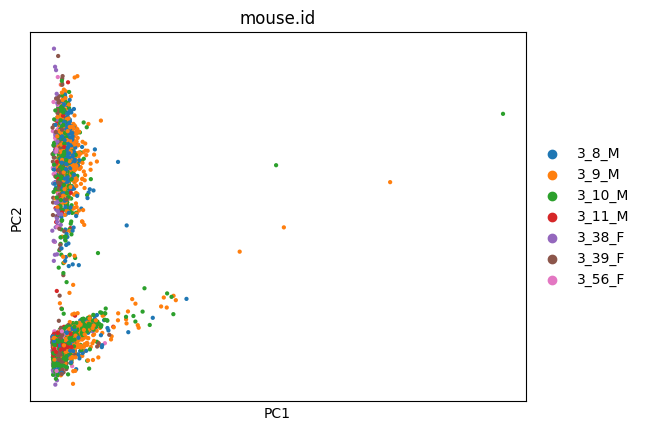

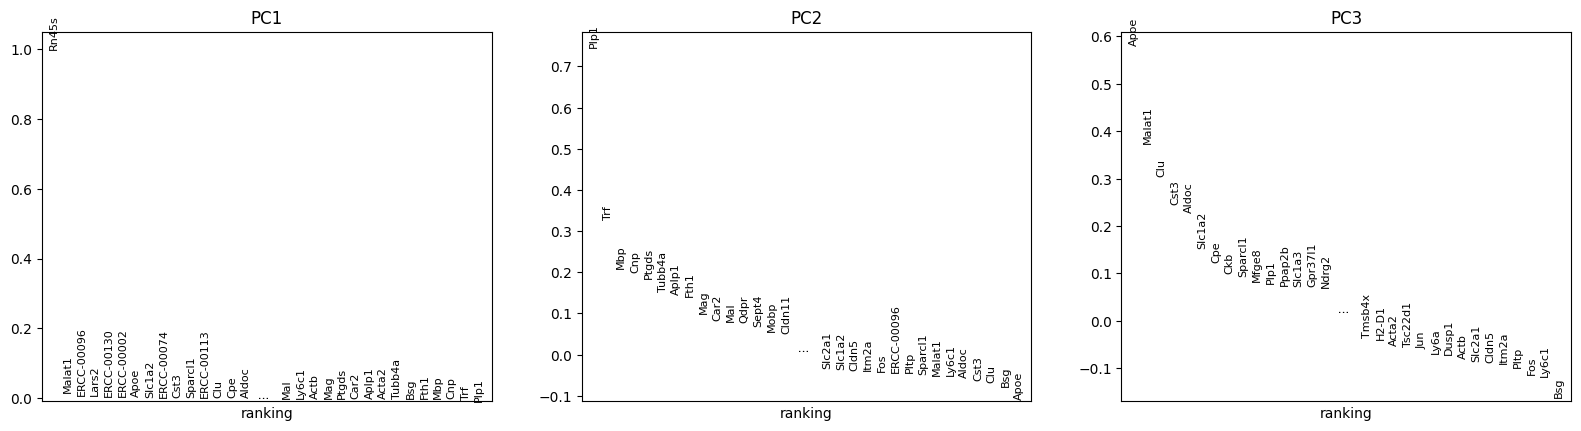

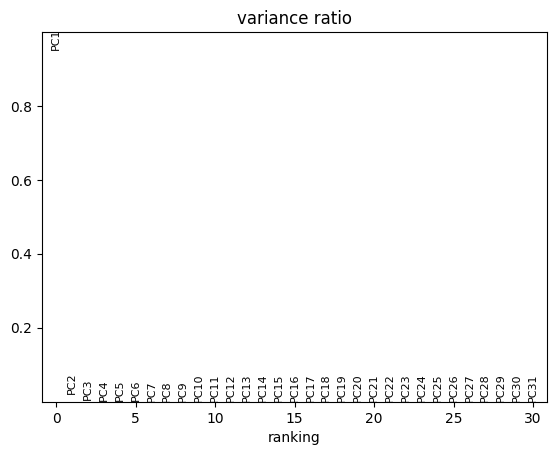

In [ ]:
adata_cpm_ex = adata.copy() # make a copy so we can compare results
sc.pp.normalize_total(adata_cpm_ex, target_sum=1e6, exclude_highly_expressed=True) # normalize
sc.pp.pca(adata_cpm_ex) # run pca
sc.pl.pca_overview(adata_cpm_ex, color='mouse.id') # plot pca

Above plot is plotted after the normalization of data. We can see that Principal Component 1 is still showing high variance and 'Rn45s' gene has higher ranking.

#### Normalizing Gene Expression

Removing 'Rn45s' gene and applying the PCA again.

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



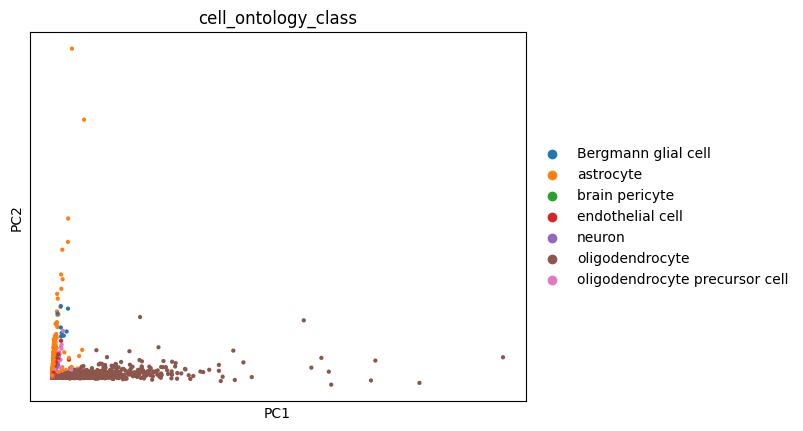

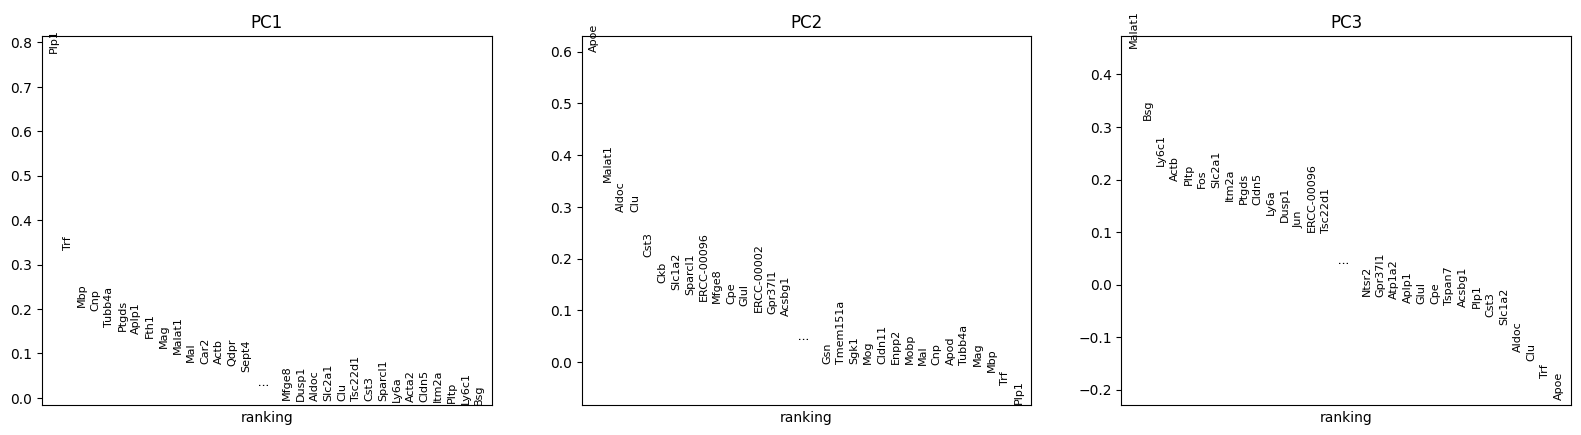

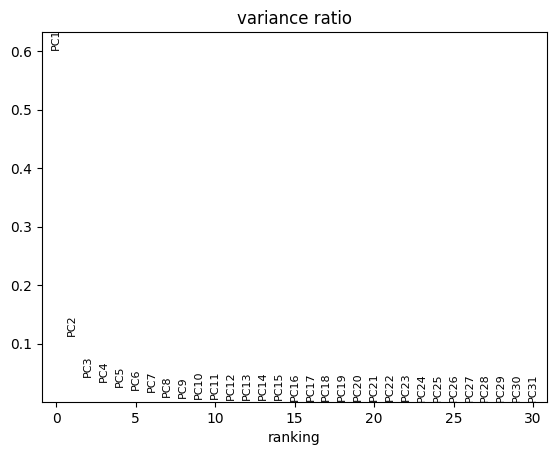

In [ ]:
adata_cpm = adata.copy()  # apply this to a copy so we can compare methods
adata_cpm.raw = adata_cpm  # store a copy of the raw values before normalizing

not_Rn45s = adata_cpm.var.index != 'Rn45s'
adata_no_Rn45s = adata_cpm[:, not_Rn45s]

sc.pp.pca(adata_no_Rn45s)
sc.pl.pca_overview(adata_no_Rn45s, color='cell_ontology_class')

In above plot, we can see that Principal Component 1 'PC1' is still showing high varinace. Due to this, we will use logrithmic function to scale the data.

Again, we will apply the PCA.

In [ ]:
adata_no_Rn45s.shape, adata.shape  # 1 gene is removed

((3210, 18584), (3210, 18585))

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



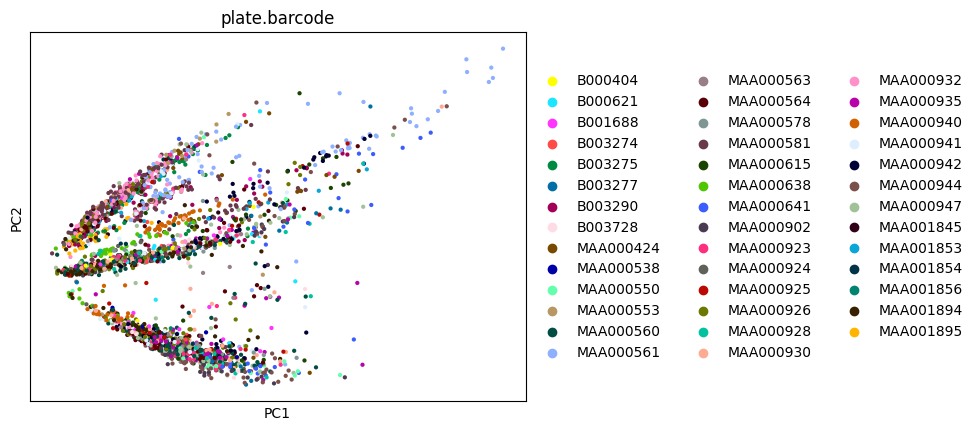

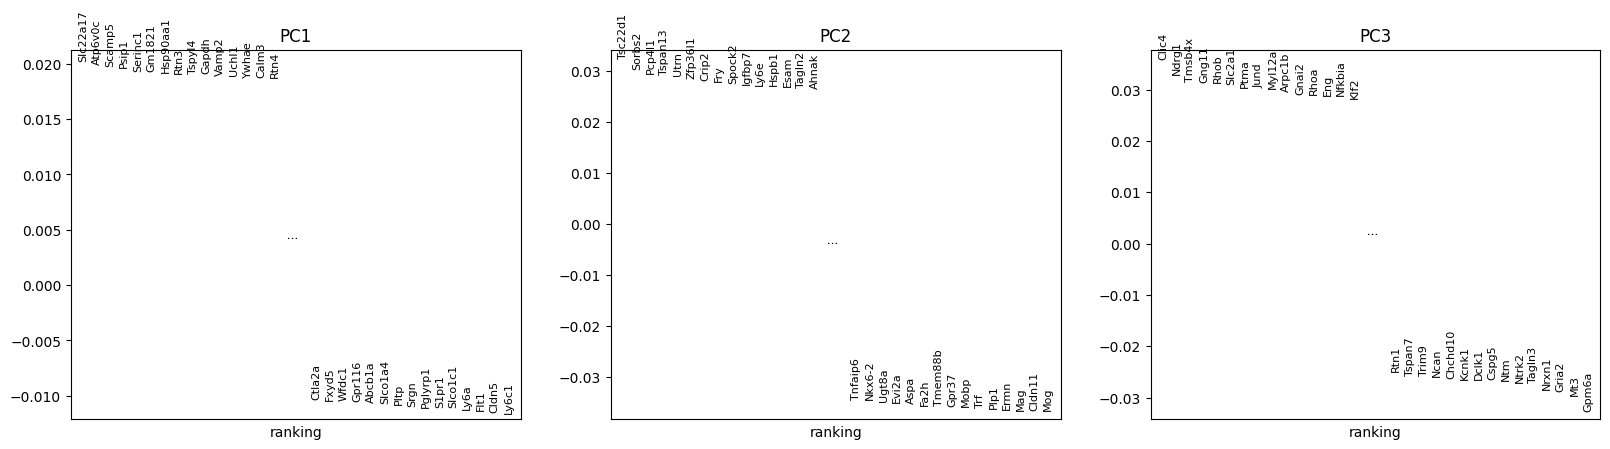

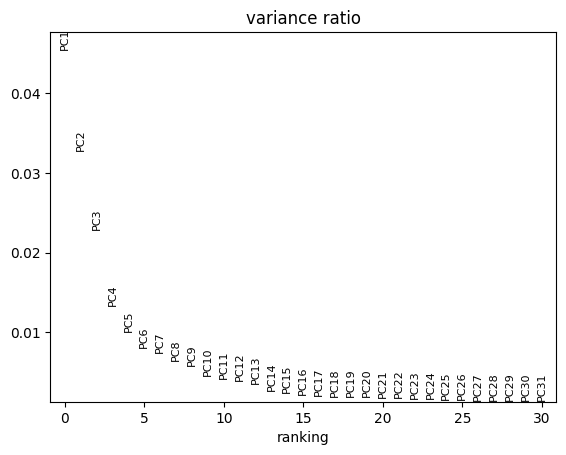

In [ ]:
sc.pp.log1p(adata_cpm)  # Returns or updates data, depending on copy. X = log(X + 1) 
sc.pp.scale(adata_cpm)  # Scale data to unit variance and zero mean.
# updates adata with a scaled adata.X, annotated with 'mean' and 'std' in adata.var.
sc.pp.pca(adata_cpm)  
sc.pl.pca_overview(adata_cpm, color='plate.barcode')

From the above plot, we can see that other principal components like PC2, PC3, PC4, and PC5 have higher variance as compared to prior PCs.

Now, we will use this method for the further operations.

In [ ]:
adata_cpm.write('data/brain_normalized.h5ad')  # saving the 1 with log1p normalization

### Dimensionality Reduction and Clustering

In [ ]:
import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from matplotlib import pyplot as plt
# magic incantation to help matplotlib work with our jupyter notebook
%matplotlib inline 

In [ ]:
adata = sc.read('data/brain_normalized.h5ad')

In [ ]:
adata.var.head()

ERCC  n_cells  n_counts      mean       std
0610005C13Rik  False       28       402  0.016222  0.205335
0610007C21Rik  False     2358    686914  3.588618  2.513318
0610007L01Rik  False      951    122212  1.076059  1.907934
0610007N19Rik  False      266     21897  0.269088  1.003561
0610007P08Rik  False      577     55529  0.595953  1.461587

In [ ]:
adata.obs.head()

cell_ontology_class    subtissue mouse.sex mouse.id  \
cell                                                                          
A1.B003290.3_38_F.1.1             astrocyte     Striatum         F   3_38_F   
A1.B003728.3_56_F.1.1             astrocyte     Striatum         F   3_56_F   
A1.MAA000560.3_10_M.1.1     oligodendrocyte       Cortex         M   3_10_M   
A1.MAA000564.3_10_M.1.1    endothelial cell     Striatum         M   3_10_M   
A1.MAA000923.3_9_M.1.1            astrocyte  Hippocampus         M    3_9_M   

                        plate.barcode  n_genes  
cell                                            
A1.B003290.3_38_F.1.1         B003290     3359  
A1.B003728.3_56_F.1.1         B003728     1718  
A1.MAA000560.3_10_M.1.1     MAA000560     3910  
A1.MAA000564.3_10_M.1.1     MAA000564     4352  
A1.MAA000923.3_9_M.1.1      MAA000923     2248

In [ ]:
adata.X.shape

(3210, 18585)

###Trying different dimensional Reductionality Technique

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
import plotly.offline as py

import plotly.graph_objs as go
from plotly.graph_objs import XAxis, YAxis, ZAxis, Scene
from sklearn.decomposition import FastICA as ICA
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.manifold import SpectralEmbedding as LaplacianEigenMaps
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.decomposition import KernelPCA

In [ ]:

def plot_clusters(labels, x_data, title):
  MEDIUM_SIZE = 10
  BIGGER_SIZE = 11

  # plot the results
  fig, axes = plt.subplots(1, 3, figsize=(20, 6))
  # Set the title for the entire figure
  fig.suptitle(title, fontsize=20)

  #KMeans
  kmeans = KMeans(n_clusters=7, random_state=42)
  kmeans.fit(x_data)
  predicted_labels_kmeans = kmeans.labels_

  sil = silhouette_score(x_data, predicted_labels_kmeans)
  rand_index = adjusted_rand_score(labels, predicted_labels_kmeans)

  axes[0].scatter(x_data[:, 0], x_data[:, 1], c=predicted_labels_kmeans, cmap='viridis')
  axes[0].set_title('KMeans Clustering', fontsize=BIGGER_SIZE, fontweight='bold')
  axes[0].text(0.5, -0.23, f"Silhouette score: {sil:.3f}\nRand Index: {rand_index:.3f}\n", 
                   transform=axes[0].transAxes, ha='center', fontsize=MEDIUM_SIZE)
  
  # Expectation maximization 
  em = GaussianMixture(n_components=7, random_state=42)
  predicted_labels_em = em.fit_predict(x_data)

  sil = silhouette_score(x_data, predicted_labels_em)
  rand_index = adjusted_rand_score(labels, predicted_labels_em)

  axes[1].scatter(x_data[:, 0], x_data[:, 1], c=predicted_labels_em, cmap='viridis')
  axes[1].set_title('Expectation-Maximization Clustering', fontsize=BIGGER_SIZE, fontweight='bold')
  axes[1].text(1.7, -0.23, f"Silhouette score: {sil:.3f}\nRand Index: {rand_index:.3f}\n", 
                   transform=axes[0].transAxes, ha='center', fontsize=MEDIUM_SIZE)
  
  
  #Hierarchical clustering
  hc = AgglomerativeClustering(n_clusters=7, linkage='ward',metric='euclidean')
  predicted_labels_hc = hc.fit_predict(x_data)

  sil = silhouette_score(x_data, predicted_labels_hc)
  rand_index = adjusted_rand_score(labels, predicted_labels_hc)

  axes[2].scatter(x_data[:, 0], x_data[:, 1], c=predicted_labels_hc, cmap='viridis')
  axes[2].set_title('Hierarchical Clustering', fontsize=BIGGER_SIZE, fontweight='bold')
  axes[2].text(2.9, -0.23, f"Silhouette score: {sil:.3f}\nRand Index: {rand_index:.3f}\n", 
                   transform=axes[0].transAxes, ha='center', fontsize=MEDIUM_SIZE)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



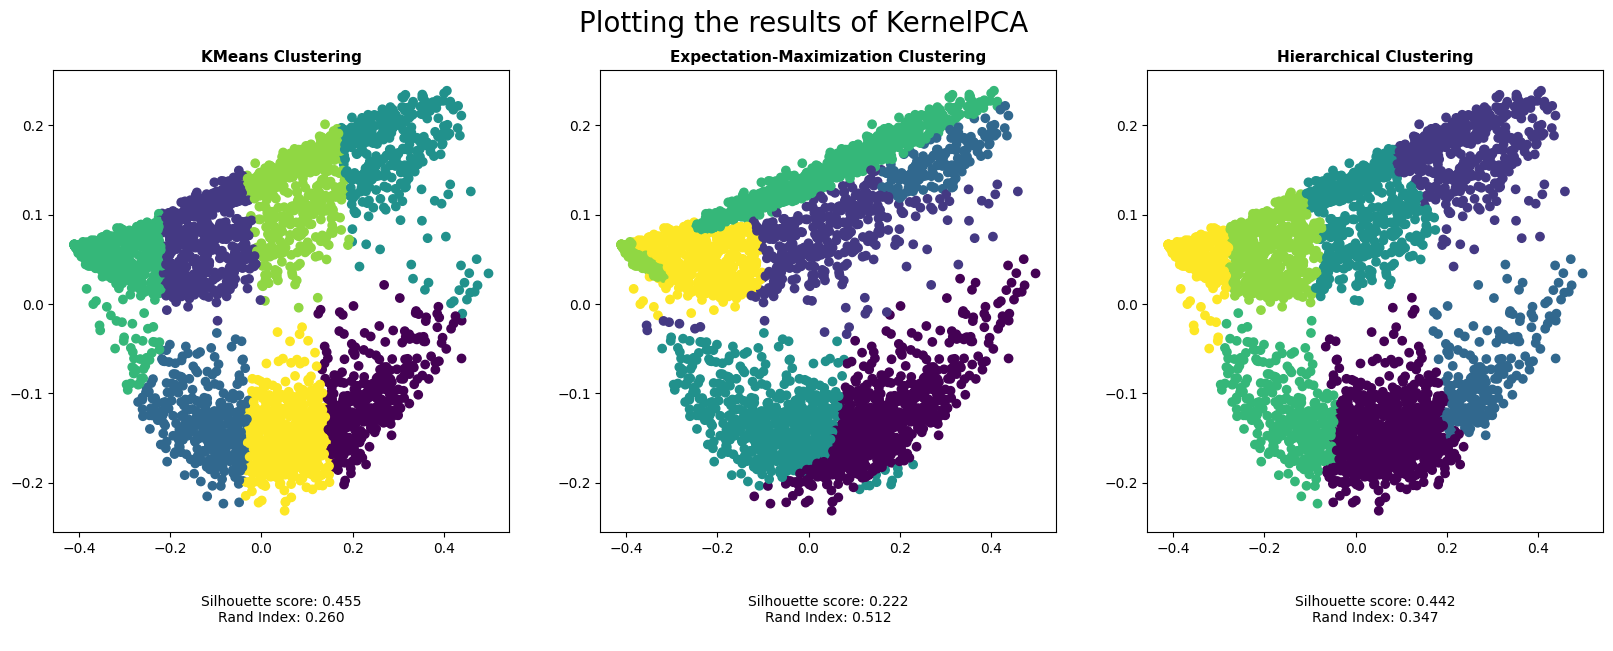

In [ ]:
Kernel_pca=KernelPCA(n_components=2,kernel= "rbf", random_state=42)
kpca=Kernel_pca.fit_transform(adata.X)
plot_clusters(adata.obs['cell_ontology_class'], kpca, "Plotting the results of KernelPCA")

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning:

Starting in v1.3, whiten='unit-variance' will be used by default.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



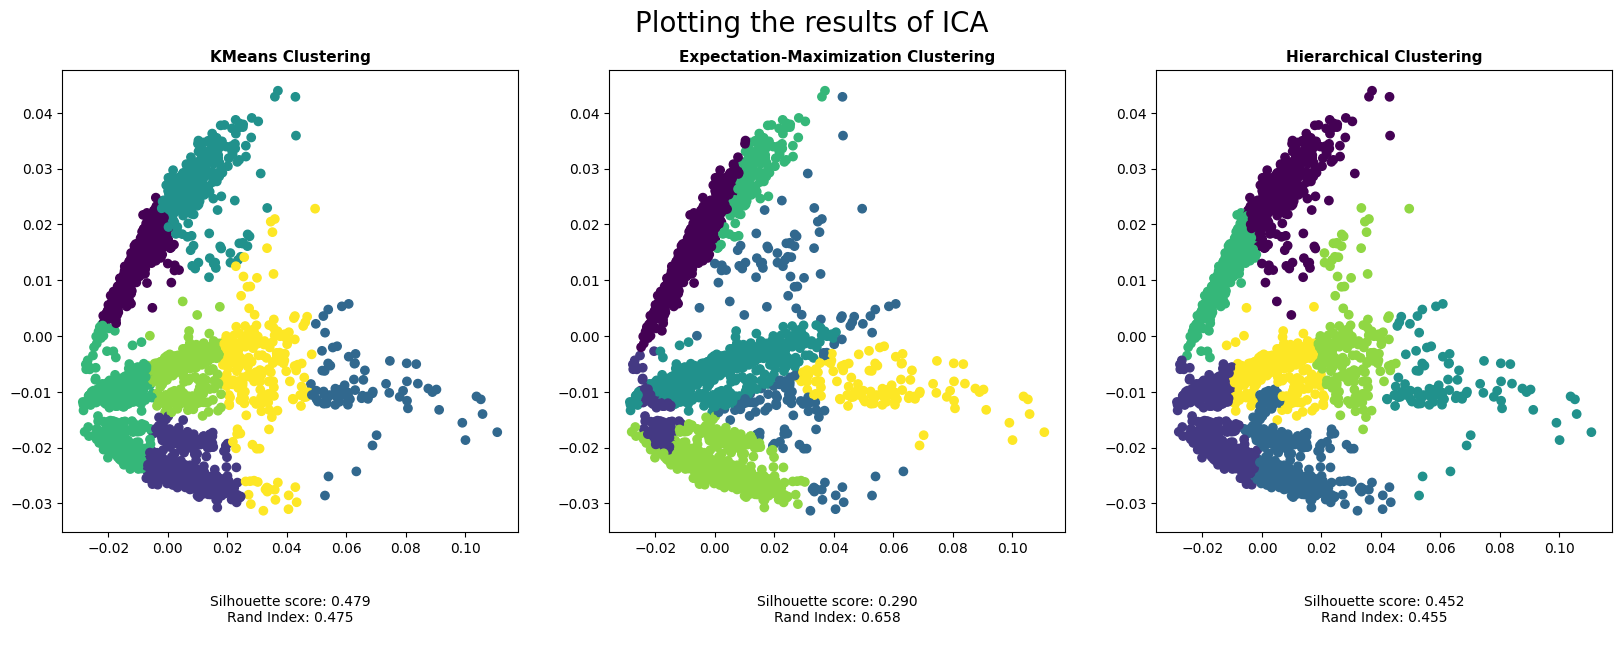

In [ ]:
ica=ICA(n_components=2)
icamap=ica.fit_transform(adata.X)
plot_clusters(adata.obs['cell_ontology_class'], icamap, "Plotting the results of ICA")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



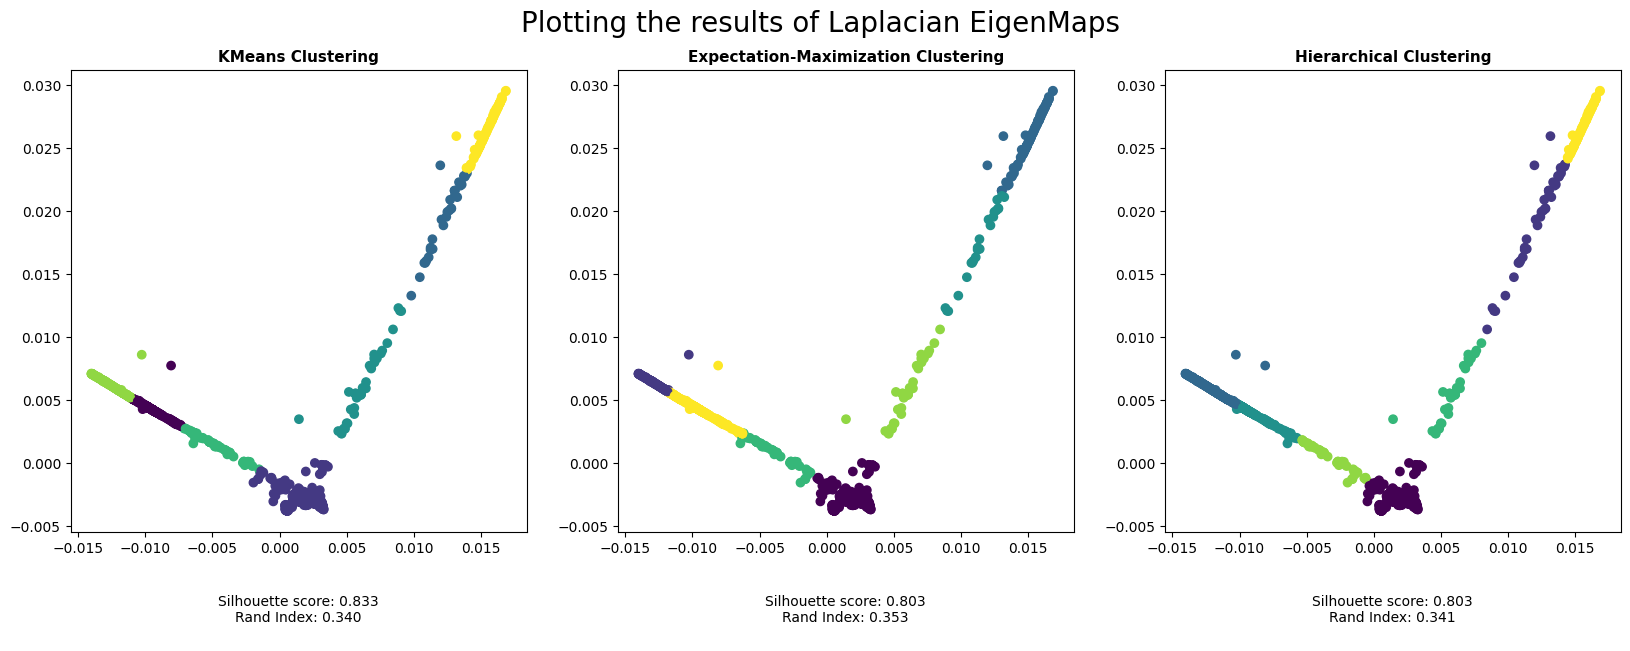

In [ ]:
le=LaplacianEigenMaps(n_components=2, n_neighbors=10)
lemaps=le.fit_transform(adata.X)
plot_clusters(adata.obs['cell_ontology_class'], lemaps, "Plotting the results of Laplacian EigenMaps")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



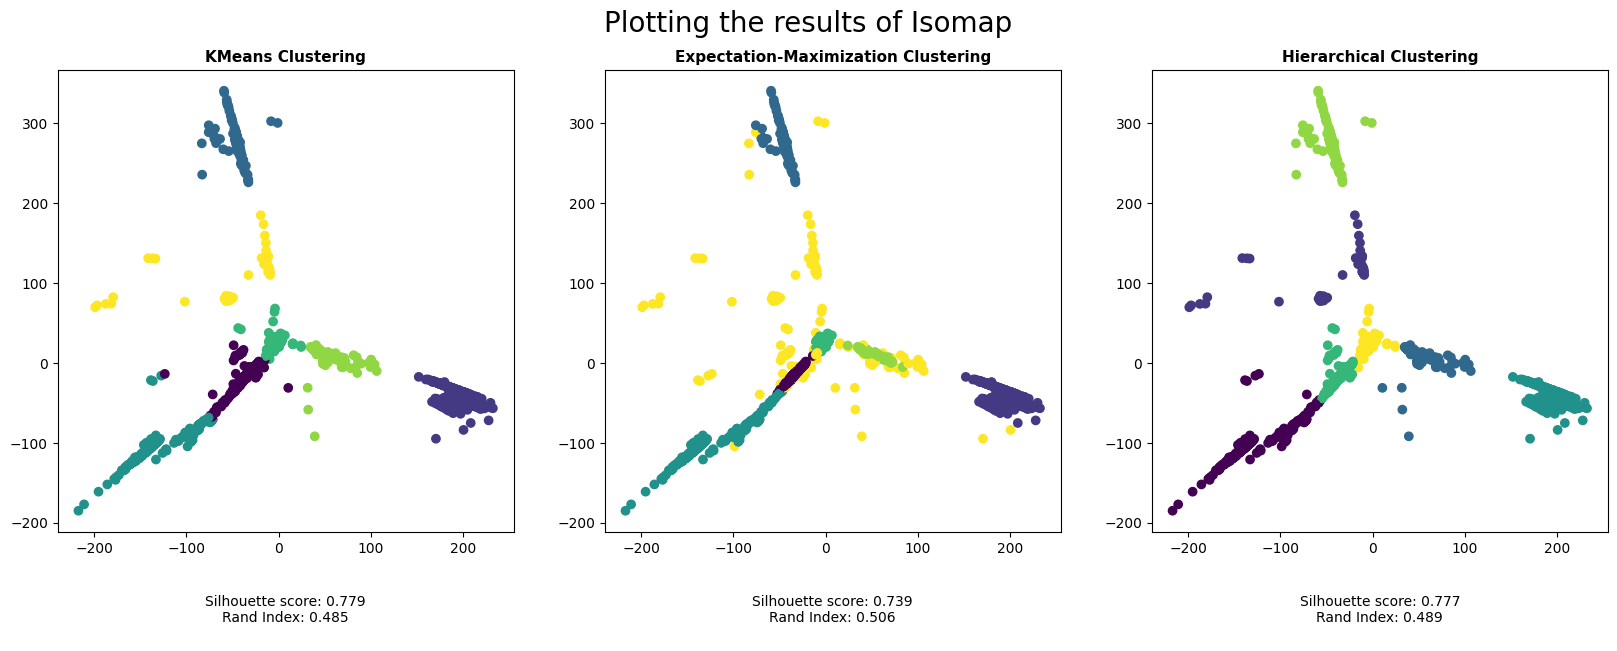

In [ ]:
iso=Isomap(n_components=2,n_neighbors=5)
isomaps=iso.fit_transform(adata.X)
plot_clusters(adata.obs['cell_ontology_class'], isomaps, "Plotting the results of Isomap")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



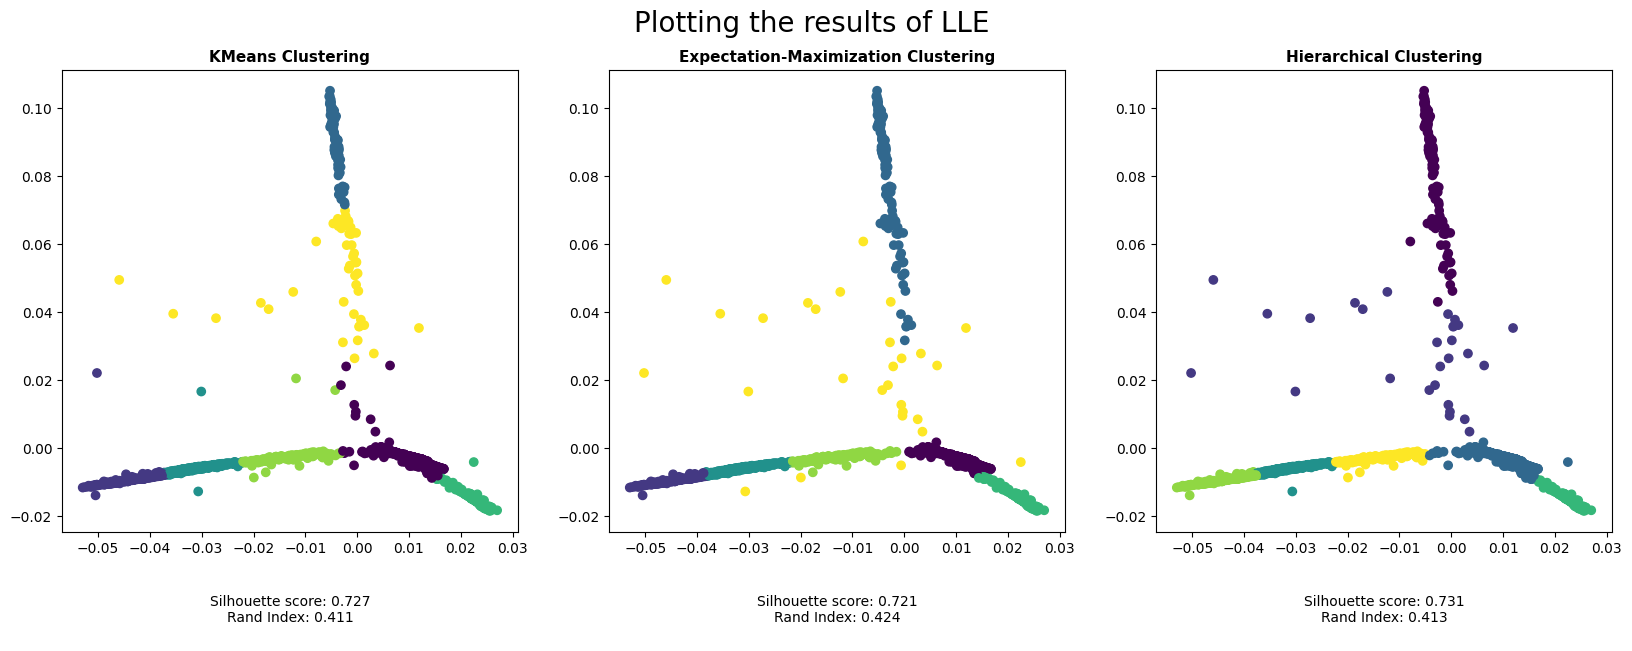

In [ ]:
le = LLE(n_components=2, n_neighbors=10,method='modified',modified_tol=1e-12, eigen_solver='dense')
mlle=le.fit_transform(adata.X)
plot_clusters(adata.obs['cell_ontology_class'], mlle, "Plotting the results of LLE")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



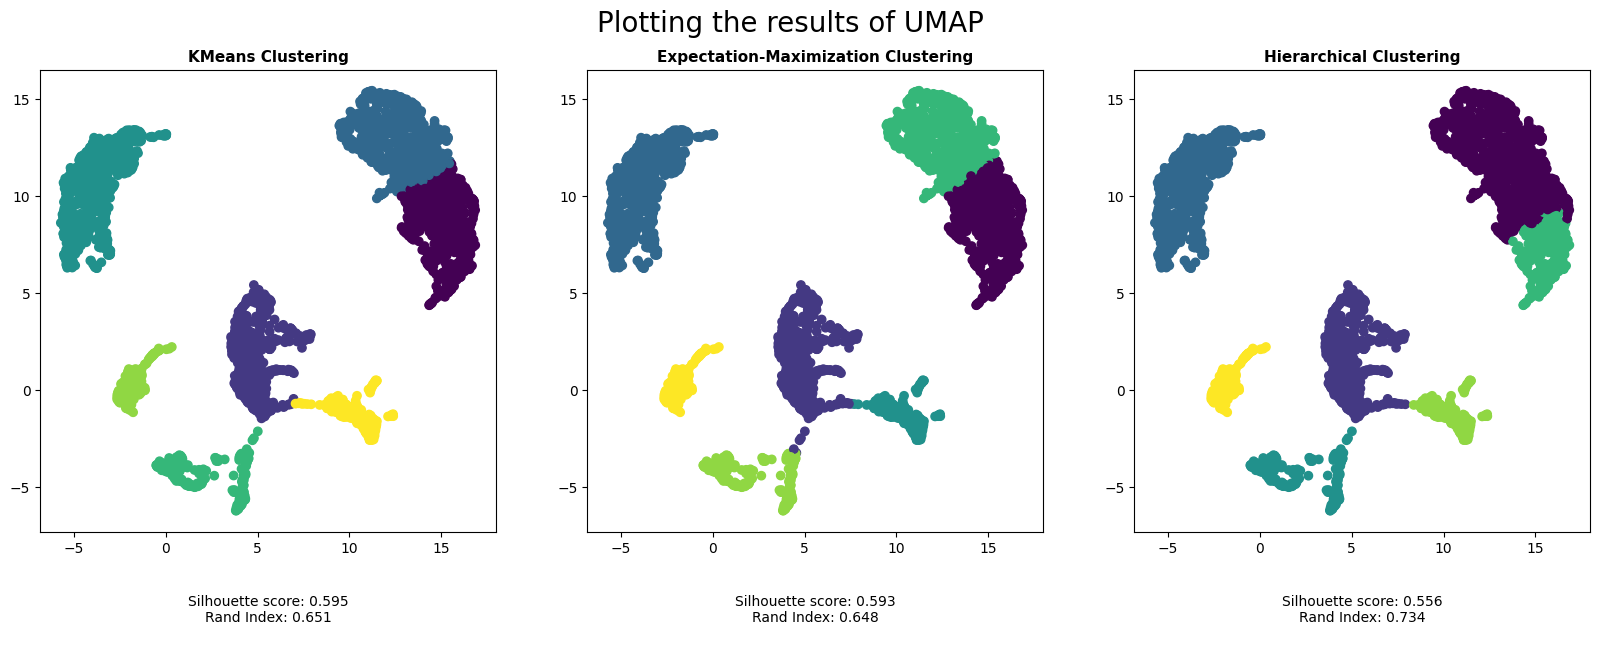

In [ ]:
sc.pp.neighbors(adata) # UMAP is based on the neighbor graph; we'll compute this first
sc.tl.umap(adata, min_dist=0.3, spread=1, random_state=42, n_components=2)  # # add X_umap in obsm
plot_clusters(adata.obs['cell_ontology_class'], adata.obsm['X_umap'], "Plotting the results of UMAP")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



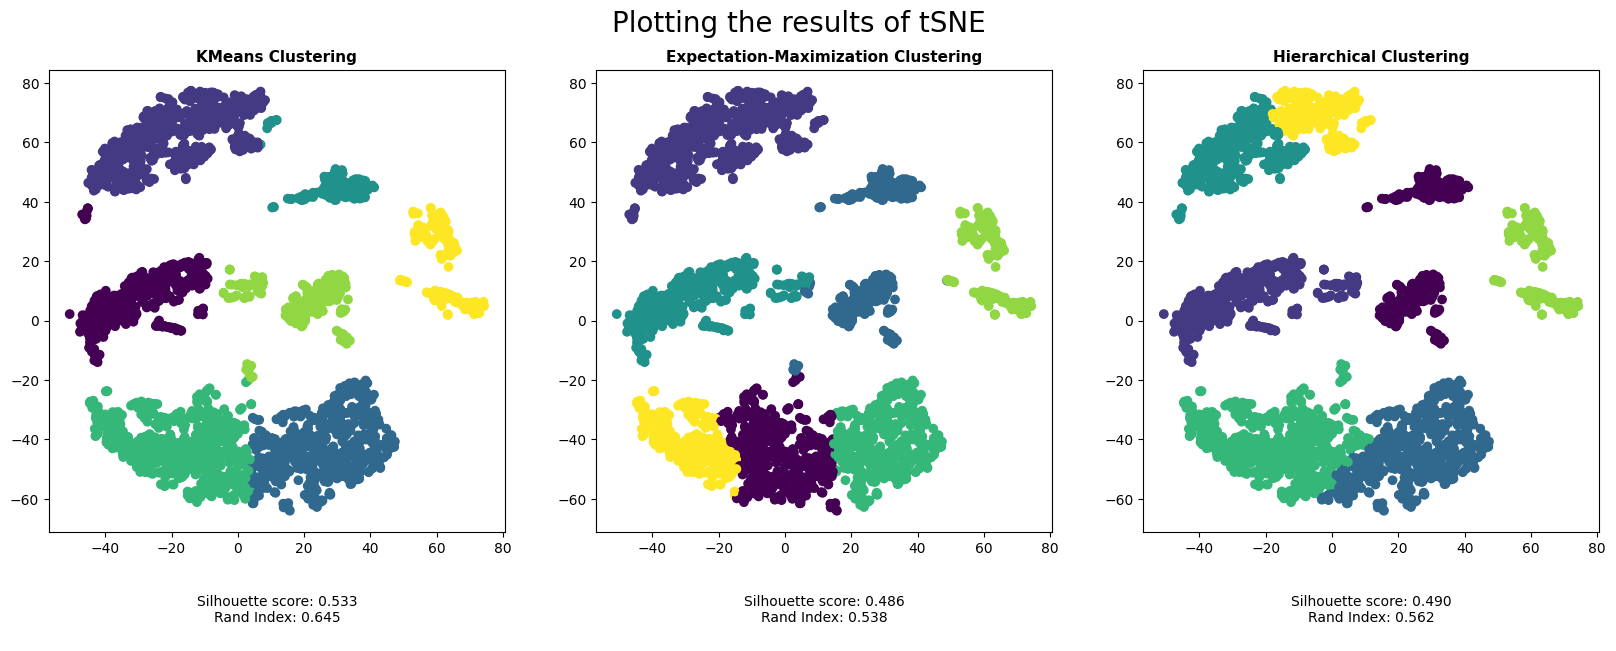

In [ ]:
sc.tl.tsne(adata, perplexity=30, learning_rate=1000, random_state=42)  # add X_tsne in obsm
plot_clusters(adata.obs['cell_ontology_class'], adata.obsm['X_tsne'], "Plotting the results of tSNE")

As per the plots and scores, we can say that UMAP performed better among all the dimesnionality reduction techniques followed by tSNE.
Also, we can see that even though Silhoutte score for Laplacian Eigenmaps, Isomaps, LLE is high but the rand index was low. This shows that these clustering algorithms can not guarantee the accuracte clusters even if the clusters are clearly seperable. Do note that with more hyperparameter tuning we might get more accuracte clusters.

In [ ]:
adata

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC', 'n_cells', 'n_counts', 'mean', 'std'
    uns: 'log1p', 'mouse.id_colors', 'pca', 'plate.barcode_colors', 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
umap_coordinates = adata.obsm['X_umap'] # extract the UMAP coordinates for each cell
hc = AgglomerativeClustering(n_clusters=7, linkage='ward',metric='euclidean').fit(umap_coordinates)
adata.obs['hc_umap'] = hc.labels_ # retrieve the labels and add them as a metadata column in our AnnData object
adata.obs['hc_umap'] = adata.obs['hc_umap'].astype(str)

In [ ]:
adata

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'hc_umap'
    var: 'ERCC', 'n_cells', 'n_counts', 'mean', 'std'
    uns: 'log1p', 'mouse.id_colors', 'pca', 'plate.barcode_colors', 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
rand_index = adjusted_rand_score(adata.obs['cell_ontology_class'], adata.obs['hc_umap'])
sil = silhouette_score(adata.obsm['X_umap'], adata.obs['hc_umap'])
print('The rand index is ', round(rand_index, 3))
print('The silhouette score is ', round(sil, 3))

The rand index is  0.734
The silhouette score is  0.556


#### Louvain algorithm (Graph-based method) 
The Louvain algorithm is a hierarchical, modularity-based clustering algorithm that optimizes the modularity measure, which quantifies the strength of community structure in a network. The algorithm iteratively optimizes the modularity by greedily merging or splitting communities until a locally optimal partition is found. It does not reduce the dimensionality of the data, but rather identifies clusters or communities of nodes within the network based on their patterns of connections.

In [ ]:
!pip install louvain 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 45.2 MB/s eta 0:00:00


In [ ]:
from scanpy.tl import louvain
louvain(adata)  # Cluster cells into subgroups # adata.obs['louvain']

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



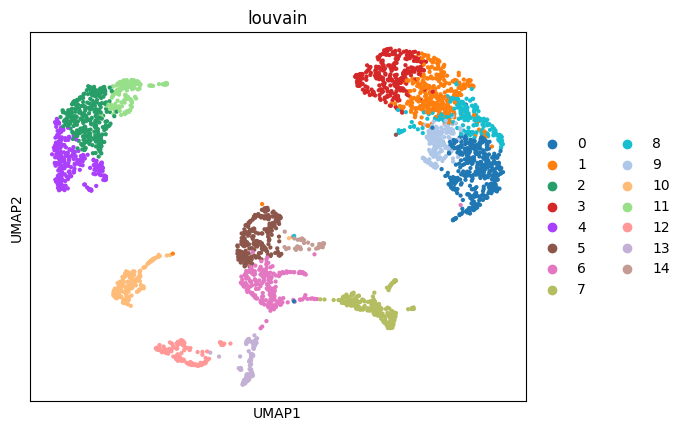

In [ ]:
sc.pl.umap(adata, color='louvain')

In [ ]:
adata.obs.head()

cell_ontology_class    subtissue mouse.sex mouse.id  \
cell                                                                          
A1.B003290.3_38_F.1.1             astrocyte     Striatum         F   3_38_F   
A1.B003728.3_56_F.1.1             astrocyte     Striatum         F   3_56_F   
A1.MAA000560.3_10_M.1.1     oligodendrocyte       Cortex         M   3_10_M   
A1.MAA000564.3_10_M.1.1    endothelial cell     Striatum         M   3_10_M   
A1.MAA000923.3_9_M.1.1            astrocyte  Hippocampus         M    3_9_M   

                        plate.barcode  n_genes hc_umap louvain  
cell                                                            
A1.B003290.3_38_F.1.1         B003290     3359       1       5  
A1.B003728.3_56_F.1.1         B003728     1718       1       6  
A1.MAA000560.3_10_M.1.1     MAA000560     3910       0       1  
A1.MAA000564.3_10_M.1.1     MAA000564     4352       2       4  
A1.MAA000923.3_9_M.1.1      MAA000923     2248       1       6

In [ ]:
rand_index = adjusted_rand_score(adata.obs['cell_ontology_class'], adata.obs['louvain'])
sil = silhouette_score(adata.obsm['X_umap'], adata.obs['louvain'])
print('The rand index is ', round(rand_index, 3))
print('The silhouette score is ', round(sil, 3))

The rand index is  0.338
The silhouette score is  0.4


The rand index is  0.36
The low rand index with the default resolution parameter is quite low (0.34), but this increases to 0.9 when we set resolution=0.1.
Higher resolution means finding more and smaller clusters

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



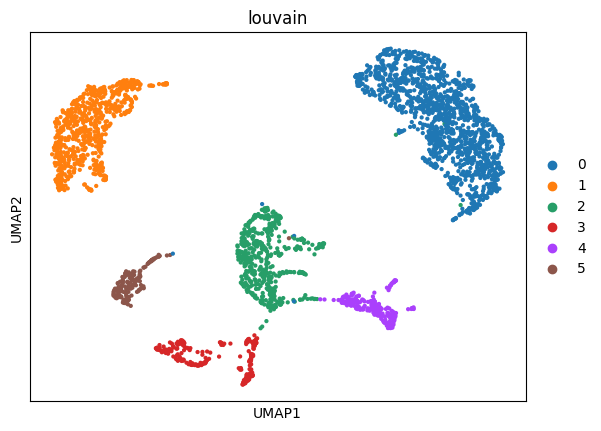

The rand index is  0.911
The silhouette score is  0.657


In [ ]:
louvain(adata, resolution = 0.1)  # Cluster cells into subgroups # adata.obs['louvain']
sc.pl.umap(adata, color='louvain')

rand_index = adjusted_rand_score(adata.obs['cell_ontology_class'], adata.obs['louvain'])
sil = silhouette_score(adata.obsm['X_umap'], adata.obs['louvain'])
print('       The rand index is ', round(rand_index, 3))
print('       The silhouette score is ', round(sil, 3))

The 0.911 rand index represents that clusters are accurately made and it is interesting to know that there are 6 clusters here, however the dataset has 7 classes. This shows that one of the classes has very less data points. Let's see how the plot with the true labels (cell_ontology_class) looks like.

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



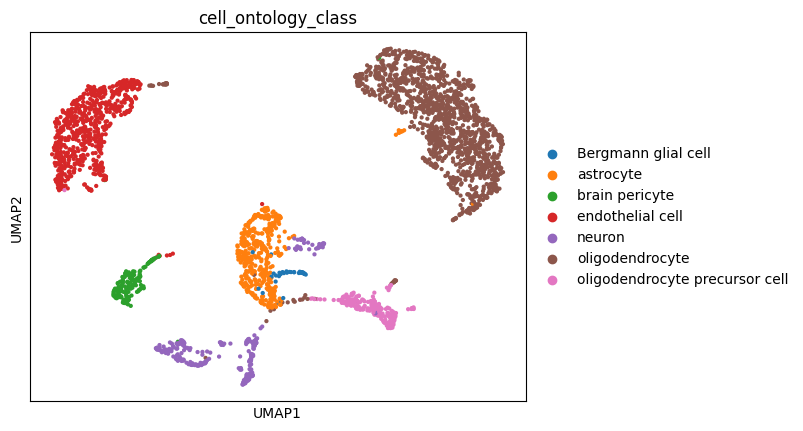

In [ ]:
sc.pl.umap(adata, color='cell_ontology_class')

As we can see that Bergmann gial cell are very less when compared to other cells.

**In summary, the Louvain algorithm is specifically designed for community detection in complex networks, while K-means, agglomerative clustering, and EM are general-purpose clustering algorithms.**